In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("Tensorflow version: " + tf.__version__)

Tensorflow version: 2.0.0


In [30]:
mnist = tf.keras.datasets.mnist

(60000, 28, 28)
(60000, 28, 28)
(60000,)


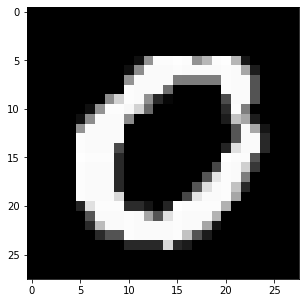

In [53]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.figure(figsize = (5,5))
plt.imshow(x_train[np.random.randint(0, len(x_train))], cmap = 'gray')

#Just checking out the data:
print(x_train.shape)
print(x_train.shape)
print(y_train.shape)

## Exercise 1: Building models for recognizing digits

In [55]:
#Part (a + b): Keras allows us to do this all together in a single step

"""
lin_model = tf.keras.models. Sequential([
                  tf.keras.layers.Dense(10, activation='linear', 
                  input_shape=(28,28),
                  use_bias = True,
                  kernel_initializer = 'zeros',
                  bias_initializer = 'zeros')
    
    
    ])
    
"""

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


    


#Part (c): Setting the learning rate

#lin_model.optimizer.lr = .5

lin_model.fit(x_train, y_train, batch_size=100, epochs= 16)



Train on 60000 samples
Epoch 1/16
  100/60000 [..............................] - ETA: 14s

ValueError: Shape mismatch: The shape of labels (received (100, 1)) should equal the shape of logits except for the last dimension (received (100, 28, 10)).

In [43]:
weights = lin_model.get_weights()

print(np.array(weights).shape)

(2,)


In [42]:
lin_model.fit(x_train, y_train, epochs=10)

lin_model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/10
   32/60000 [..............................] - ETA: 49s

ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).

784

In [ ]:
# Part (a): Softmaxing the outputs

from scipy.special import softmax

y_train = softmax(y_train)

# Initialize weight- and bias-vector:

W = np.zeros((10,784))
thetas = np.zeros(10)

# Part(b): "Loss = Crossentropy – KL-divergence"

loss = lambda yHat,y: np.sum(yHat * np.log((yHat / y)))

# Part(c): 